<a href="https://colab.research.google.com/github/siddharth0517/Spotify-Song-Recommendation-System-with-UCB/blob/main/Spotify_Song_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Song Recommendation System with UCB


In [1]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 8.7 MB/s eta 0:00:00


**1. Importing Libraries**

In [2]:
import math
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

**2. Authenticate with Spotify**

In [3]:
client_id = "your-client-id"
client_secret = "your-client-secret"


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))


**3. Function to fetch Songs**

In [14]:
results = sp.search(q='genre:rock', type='track', limit=20)
tracks = results['tracks']['items']
song_data = []
for track in tracks:
    song_features = sp.audio_features(track['id'])[0]
    song_data.append({
        'name': track['name'],
        'id': track['id'],
        'popularity': track['popularity'],
        'energy': song_features['energy'],
        'valence': song_features['valence'],
        'tempo': song_features['tempo']
    })


**4. UCB implementation for recommending songs**

In [15]:
import math

class UCBRecommender:
    def __init__(self, song_data):
        self.song_data = song_data
        self.song_rewards = [0] * len(song_data)
        self.song_selections = [0] * len(song_data)
        self.total_selections = 0

    def recommend_song(self):
        song_index = 0
        max_upper_bound = 0
        for i in range(len(self.song_data)):
            if self.song_selections[i] > 0:
                avg_reward = self.song_rewards[i] / self.song_selections[i]
                delta = math.sqrt(3/2 * math.log(self.total_selections + 1) / self.song_selections[i])
                upper_bound = avg_reward + delta
            else:
                upper_bound = 1e400  # Explore unselected songs
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                song_index = i

        self.song_selections[song_index] += 1
        self.total_selections += 1

        return self.song_data[song_index]


** Feedback Based on Time of Day**

In [16]:
from datetime import datetime

def user_feedback(song):

    current_hour = datetime.now().hour


    popularity_weight = 0.2
    energy_weight = 0.0
    valence_weight = 0.0
    tempo_weight = 0.0


    if 6 <= current_hour < 18:

        energy_weight = 0.5
        valence_weight = 0.3
    else:

        tempo_weight = 0.5
        valence_weight = 0.3


    popularity_score = song['popularity'] / 100
    energy_score = song['energy']
    valence_score = song['valence']
    tempo_score = song['tempo'] / 200

    total_score = (popularity_weight * popularity_score +
                   energy_weight * energy_score +
                   valence_weight * valence_score +
                   tempo_weight * tempo_score)


    return 1 if total_score > 0.7 else 0


In [18]:
ucb_recommender = UCBRecommender(song_data)

for _ in range(25):
    recommended_song = ucb_recommender.recommend_song()
    print(f"Recommended: {recommended_song['name']}")
    reward = user_feedback(recommended_song)
    song_index = song_data.index(recommended_song)
    ucb_recommender.song_rewards[song_index] += reward


Recommended: Sweater Weather
Recommended: 505
Recommended: Mr. Brightside
Recommended: Dreams - 2004 Remaster
Recommended: Take Me to Church
Recommended: Rich Girl
Recommended: Evergreen
Recommended: I Wanna Be Yours
Recommended: Linger
Recommended: Brown Eyed Girl
Recommended: Cigarette Daydreams
Recommended: Iris
Recommended: The Emptiness Machine
Recommended: Too Sweet
Recommended: Work Song
Recommended: Creep
Recommended: Don't Stop Believin' (2022 Remaster)
Recommended: Numb
Recommended: Fortunate Son
Recommended: Everlong
Recommended: Sweater Weather
Recommended: Rich Girl
Recommended: Brown Eyed Girl
Recommended: The Emptiness Machine
Recommended: Too Sweet


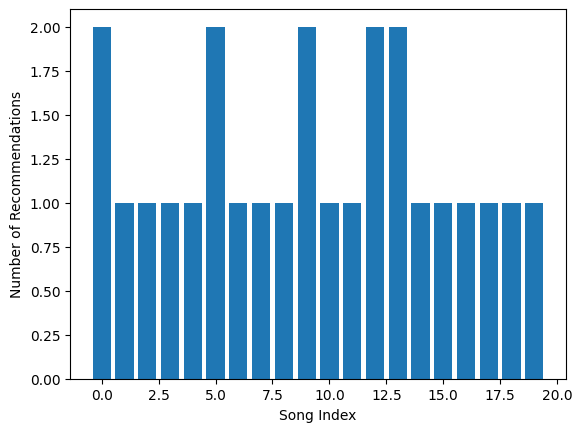

In [19]:
import matplotlib.pyplot as plt

plt.bar(range(len(song_data)), ucb_recommender.song_selections)
plt.xlabel('Song Index')
plt.ylabel('Number of Recommendations')
plt.show()
